In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline 

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 999)

path = 'data/Litoral-data-2020-06-01-2021-06-01-Weather-interview.csv'
weather = pd.read_csv(path, encoding='utf-8', header=0, sep=',', decimal=".")

path = 'data/Litoral-data-2020-06-01-2021-06-01-Main Meter-interview.csv'
meter = pd.read_csv(path, encoding='utf-8', header=0, sep=',', decimal=".")


In [8]:
print('weather shape:')
print(weather.shape[0], weather.shape[1])
print('meter shape:')
print(meter.shape[0], meter.shape[1])

weather shape:
105121 5
meter shape:
105121 2


In [3]:
print('weather columns:', weather.columns.values)
print('meter columns:', meter.columns.values)

weather columns: ['ts' 'g' 'ghi' 'ambT' 'panT']
meter columns: ['ts' 'P']


In [9]:
# Data type conversions
weather.ts = weather.ts.astype('datetime64[m]')
weather.g = weather.g.astype('float32')
weather.ghi = weather.ghi.astype('float32')
weather.ambT = weather.ambT.astype('float32')
weather.panT = weather.panT.astype('float32')

meter.ts = meter.ts.astype('datetime64[s]')
meter.P = meter.P.astype('float32')

df = meter.merge(weather, on='ts', how='left')
df.sort_values(by=['ts'], ascending=[True])
df.set_index('ts', inplace=True)
df.dtypes

P       float32
g       float32
ghi     float32
ambT    float32
panT    float32
dtype: object

In [19]:
ts_min = np.min(df.index)
ts_max = np.max(df.index)
ts_min, ts_max

msg = "Database from/to: \n{}\n{}"
tf = "%d/%m/%Y (%H:%M)"
print(msg.format(ts_min.strftime(tf), ts_max.strftime(tf)))

Database from/to: 
01/06/2020 (07:35)
01/06/2021 (00:00)


# Filling missing values



In [10]:
df.ffill(inplace=True)

for column in df.columns:
    print("Column: {}, has NaN: {}".format(column, df[column].isnull().any()))
df = df.dropna()

Column: P, has NaN: False
Column: g, has NaN: False
Column: ghi, has NaN: True
Column: ambT, has NaN: False
Column: panT, has NaN: False


In [11]:
ts_min = np.min(df.index)
ts_max = np.max(df.index)
delta = ts_max - ts_min 
dates = np.arange(ts_min, ts_max, delta).astype(datetime)
print(pd.date_range(start=ts_min, end=ts_max, freq='5min').shape)
print(df.shape)

(105030,)
(105030, 5)


In [12]:
df.describe().transpose()

count         mean          std     min        25%        50%  \
P     105030.0  3429.562500  4958.478516 -85.458 -25.906000  -3.807893   
g     105030.0   261.051025   378.055359   0.001   0.368000   2.648000   
ghi   105030.0   207.886749   314.143280   0.001   0.498000   3.315500   
ambT  105030.0    18.234091     7.123792   0.002  13.560250  19.962999   
panT  105030.0    23.392347    16.281343   0.001  11.637125  18.992001   

              75%           max  
P     7055.946167  16150.568359  
g      527.341629   1198.729980  
ghi    350.494743   1199.380005  
ambT    21.763750     41.637001  
panT    33.845626     69.004997

In [95]:
sns.pairplot(df);

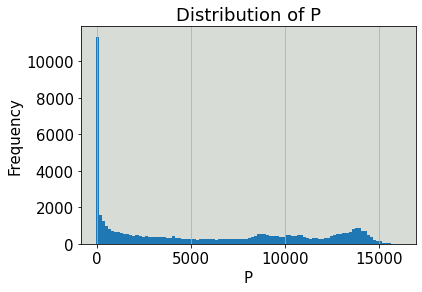

In [53]:
# Percentage of lower values to show
# 100 - show all the histogram
# 10 - show the 10% of the smalest values
percentage = 100
bins = 100

for i in df.columns[:].values:
    fig, ax = plt.subplots()
    df[i].hist(ax=ax, bins = bins, range=(df[i].min(), df[i].max()/(100/percentage)))
    ax.set_ylabel('Frequency')
    ax.set_xlabel('{}'.format(i))
    ax.grid(axis='y')
    ax.figsize=(15,8)
    ax.set_facecolor('#d8dcd6')
    ax.set_title('Distribution of {}'.format(i))

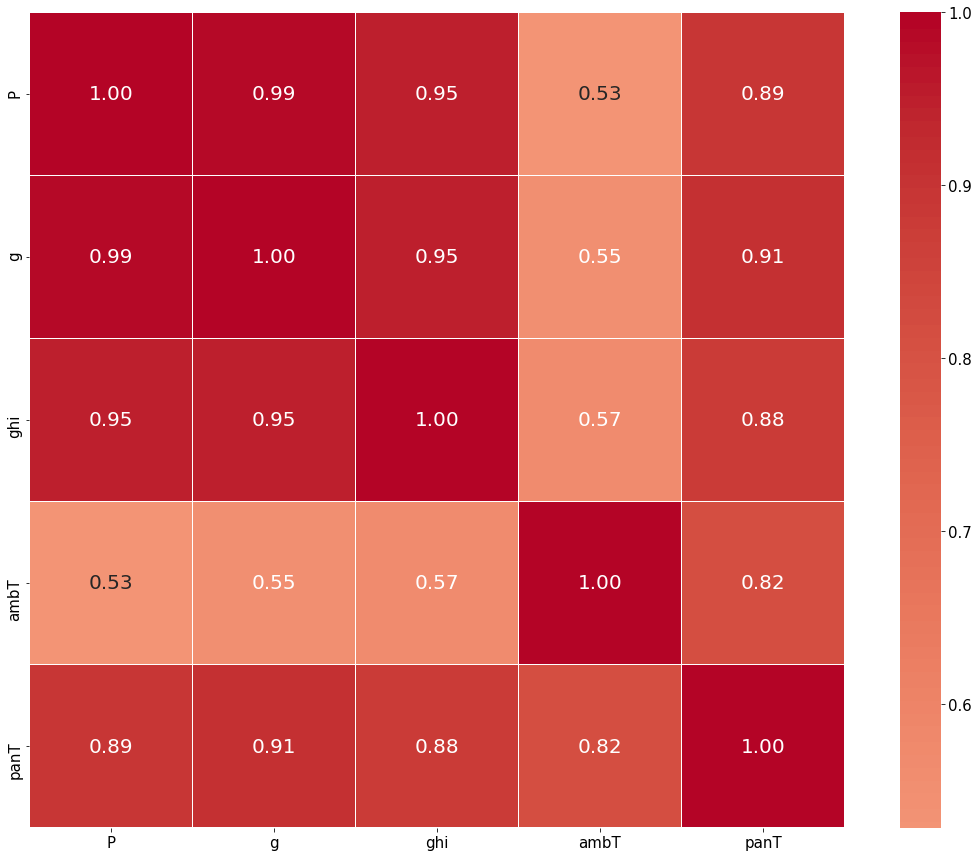

In [9]:
# Adjust the size of the figure
plt.figure(figsize=(20,15))
plt.rcParams.update({'font.size': 15})

sns.heatmap(df.corr(), center=0,
            square=True, linewidths=.5, annot=True, fmt='.2f', cmap='coolwarm',annot_kws={"fontsize":20});

In [15]:
def plot_series(df, column, start, end):
    """
    start: Timestamp('YYYY-MM-DD hh:mm:ss')
    end:  Timestamp('YYYY-MM-DD hh:mm:ss')
    """
    #start_filter = (df.index.year > start.year) & (df.index.month > start.month) & (df.index.day > start.day)
    #end_filter   = (df.index.year < end.year) & (df.index.month < end.month) & (df.index.day < end.day)
    start_filter = (df.index >= start)
    end_filter   = (df.index < end)
    df_plot = df[start_filter & end_filter]
    plt.figure(figsize=(20,8))
    plt.plot_date(df_plot.index, df_plot[column], linestyle ='solid', ms=.5)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.suptitle("{} (N = {}) \n from {} \n to {} \n ".format(column,  df_plot.shape[0], start.strftime("%d %b, %Y (%H:%M)"), end.strftime("%d %b, %Y (%H:%M)")))
    plt.show()

In [17]:
from datetime import datetime

#       datetime(yyyy, m, d, h, m, s)
start = datetime(2020, 8, 10, 4, 0, 0)
end   = datetime(2020, 8, 11, 4, 0, 0)

plot_series(df, 'P', start, end)

In [13]:
name = 'data/atlas.csv'
df.to_csv(name)
print(name, "saved!")

data/atlas.csv saved!
